# Energy Consumption Data Preparation

This notebook focuses on loading, inspecting, and preparing the energy consumption data for further analysis and modeling. The steps include:
1. Loading the raw data.
2. Performing an initial inspection to identify missing values or inconsistencies.
3. Preparing the data by handling missing values, correcting data types, and creating new features.
4. Saving the cleaned and processed data for further use.


## Setup
Include all necessary imports and define paths for raw and processed data files.


In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths
raw_data_path = "../data/raw/hourly_energy_consumption_pjme.csv"
processed_data_path = "../data/processed/cleaned_energy_consumption.csv"

# Verify matplotlib installation (optional)
print(f"Matplotlib version: {plt.matplotlib.__version__}")


Matplotlib version: 3.10.0


## Loading the Data

In this section, we load the raw energy consumption dataset and verify its structure by displaying the first few rows.


In [14]:
# Load the dataset
energy_data = pd.read_csv(raw_data_path)

# Display the first few rows of the dataset
print(energy_data.head())

# Check data types and missing values
print(energy_data.info())


              Datetime  PJME_MW
0  2002-12-31 01:00:00  26498.0
1  2002-12-31 02:00:00  25147.0
2  2002-12-31 03:00:00  24574.0
3  2002-12-31 04:00:00  24393.0
4  2002-12-31 05:00:00  24860.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB
None


## Initial Inspection

Here, we inspect the dataset for:
1. Missing values.
2. Data types and inconsistencies.
3. Basic statistics to understand variable distributions.


In [15]:
# Check for missing values
print("Missing values per column:")
print(energy_data.isnull().sum())

# Summary statistics for numerical columns
print("Summary statistics:")
print(energy_data.describe())


Missing values per column:
Datetime    0
PJME_MW     0
dtype: int64
Summary statistics:
             PJME_MW
count  145366.000000
mean    32080.222831
std      6464.012166
min     14544.000000
25%     27573.000000
50%     31421.000000
75%     35650.000000
max     62009.000000


## Data Preparation

This section includes:
1. Handling missing values (if applicable).
2. Converting data types (e.g., `Datetime` column).
3. Creating new features for analysis (e.g., hour of day, day of week).
4. Saving the processed dataset for future use.

In [16]:
# Impute missing values for numerical columns with mean
numerical_cols = ['PJME_MW']  # Replace with actual column names if needed
for col in numerical_cols:
    if energy_data[col].isnull().sum() > 0:
        energy_data[col].fillna(energy_data[col].mean(), inplace=True)

# Verify no missing values remain
print("Missing values after treatment:")
print(energy_data.isnull().sum())


Missing values after treatment:
Datetime    0
PJME_MW     0
dtype: int64


## Feature Engineering
We create new features to capture additional patterns in the data.

In [17]:
# Convert 'Datetime' column to datetime type
energy_data['Datetime'] = pd.to_datetime(energy_data['Datetime'])

# Set 'Datetime' as index for time series analysis
energy_data.set_index('Datetime', inplace=True)

# Create new features: hour of day and day of week
energy_data['hour'] = energy_data.index.hour
energy_data['day_of_week'] = energy_data.index.dayofweek

# Display updated dataset structure
print(energy_data.head())


                     PJME_MW  hour  day_of_week
Datetime                                       
2002-12-31 01:00:00  26498.0     1            1
2002-12-31 02:00:00  25147.0     2            1
2002-12-31 03:00:00  24574.0     3            1
2002-12-31 04:00:00  24393.0     4            1
2002-12-31 05:00:00  24860.0     5            1


## Initial Visualization

We will visualize:
1. Energy consumption over time.
2. The distribution of energy consumption values.


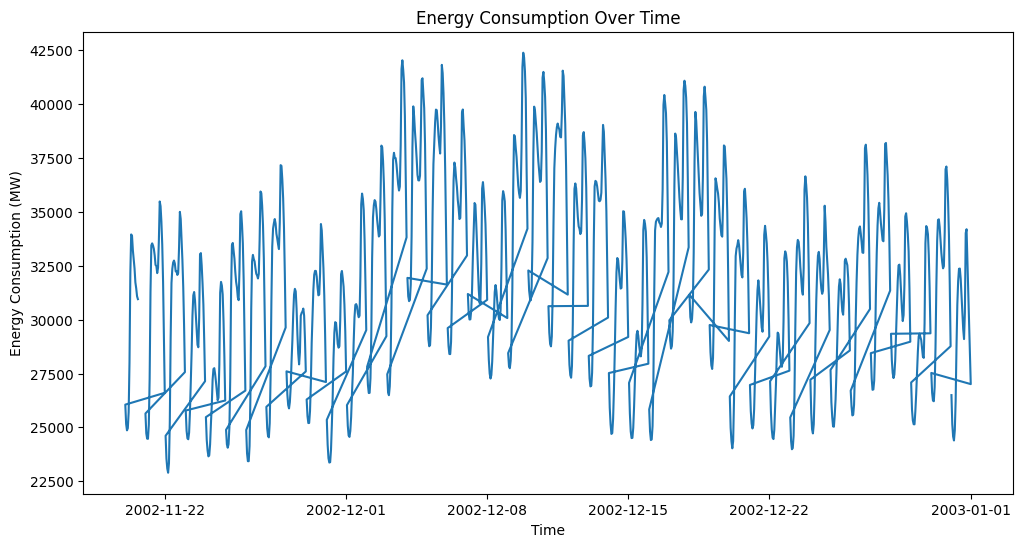

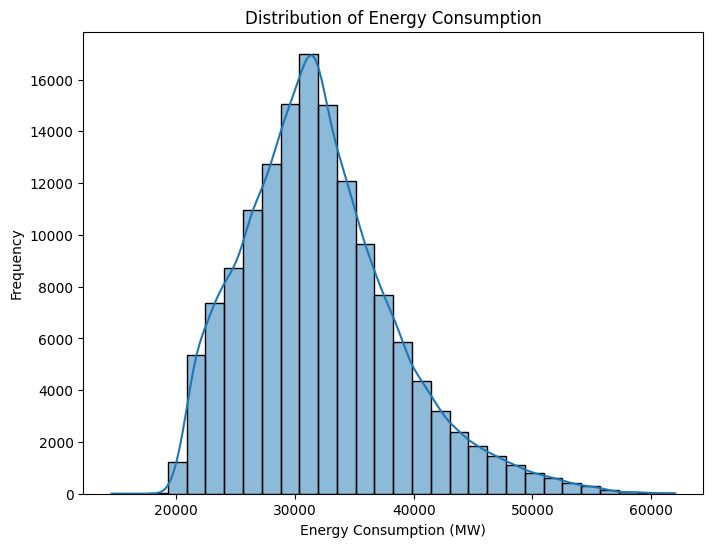

In [18]:
# Plot energy consumption over time (sample)
plt.figure(figsize=(12, 6))
plt.plot(energy_data.index[:1000], energy_data['PJME_MW'][:1000])
plt.title("Energy Consumption Over Time")
plt.xlabel("Time")
plt.ylabel("Energy Consumption (MW)")
plt.show()

# Histogram of energy consumption values
plt.figure(figsize=(8, 6))
sns.histplot(energy_data['PJME_MW'], bins=30, kde=True)
plt.title("Distribution of Energy Consumption")
plt.xlabel("Energy Consumption (MW)")
plt.ylabel("Frequency")
plt.show()

## Saving Processed Data
The cleaned dataset is saved in the `data/processed/` directory with a descriptive name.


In [19]:
# Save processed dataset to CSV file
processed_path = "../data/processed/cleaned_energy_consumption.csv"
energy_data.to_csv(processed_path, index=False)
print(f"Processed data saved at {processed_path}")

Processed data saved at ../data/processed/cleaned_energy_consumption.csv


## Conclusion

The exploratory data analysis (EDA) provided valuable insights into the energy consumption dataset. Below is a summary of the findings and the next steps for the project:

---

### Findings

#### Data Quality
- The energy consumption dataset does not have missing values.
- The dataset exhibits consistent data types and no apparent anomalies.

#### Patterns Identified
- Energy consumption shows clear daily and weekly seasonality, with peaks during weekdays and lower consumption on weekends.
- The histogram of energy consumption indicates a right-skewed distribution, with most values concentrated around the mean (~32,000 MW).
- The time-series visualization highlights periodic fluctuations, with higher consumption during colder months.

#### Visualizations
1. The first plot demonstrates energy consumption over time, showing regular patterns and seasonal trends.
2. The histogram reveals the distribution of energy consumption values, supporting the observation of skewness.

---

### Next Steps

#### Feature Engineering
- Create new features such as:
  - *Day of the week*: To capture weekday vs. weekend patterns.
  - *Hour of the day*: To identify peak hours of energy usage.
  - *Seasonal indicators*: To account for seasonal variations.

#### Model Preparation
- Prepare the processed dataset for modeling by scaling or normalizing numerical variables if necessary.
- Save the processed dataset in the `data/processed/` directory as `cleaned_energy_consumption.csv`.

#### Modeling Phase
- Begin testing baseline predictive models (e.g., linear regression) to forecast energy consumption.
- Evaluate model performance using metrics such as \( R^2 \), RMSE, and MAE.

#### Validation and Refinement
- Validate model predictions using cross-validation techniques.
- Refine feature engineering based on model performance and residual analysis.
